In [1]:
import matplotlib.pyplot as plt
import numpy as np

from scipy import stats

import antithetic

In [2]:
plt.rc(
    "axes",
    axisbelow = True,
    labelsize = 15,
    titlesize = 18
)
plt.rc("font", family = "serif")
plt.rc("legend", fontsize = 15)
plt.rc("text", usetex = True)
plt.rc("xtick", labelsize = 15)
plt.rc("ytick", labelsize = 15)

In [3]:
seed_value = 220402
num_pairs = 10000
base_rho = -0.7
step = 20

## Gaussian Distribution
#### Generate a Sequence of Antithetic Random Variables

In [4]:
normal = antithetic.scalars.Normal(correlation = base_rho, seed = seed_value)
seq1 = normal.get_sequence(10)

normal.set_seed(seed_value)
seq2 = normal.get_sequence(10, method = "shuffle")

print(np.c_[seq1, seq2])

[[-0.38298733  0.53109212]
 [-0.20800241  0.31618957]
 [ 0.70870645  0.2538098 ]
 [ 0.53109212  0.70870645]
 [-0.86367634 -2.21265154]
 [ 0.23532983 -0.38298733]
 [ 0.94633562 -0.86367634]
 [-2.21265154 -0.20800241]
 [ 0.2538098   0.23532983]
 [ 0.31618957  0.94633562]]


#### Compare Within-Pair Observations to Across-Pair Observations

In [5]:
sequence = normal.get_sequence(2*num_pairs)
evens = sequence[::2]
odds = sequence[1::2]

r_within = antithetic.correlation(odds, evens)
r_across = antithetic.correlation(odds[:-1], evens[1:])

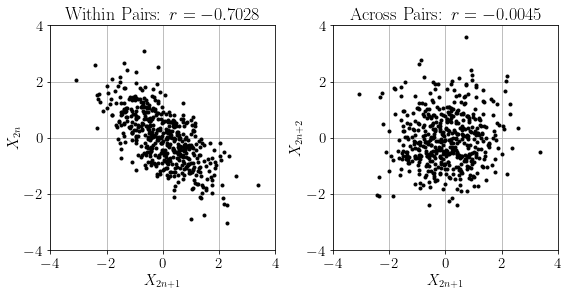

In [6]:
fig01 = plt.figure(figsize = (8, 4))
ax = fig01.add_subplot(121, aspect = "equal")
ax.plot(odds[::step], evens[::step], "k.")
ax.set_xlim((-4.0, 4.0))
ax.set_ylim((-4.0, 4.0))
ax.set_xlabel(r"$X_{2n+1}$")
ax.set_ylabel(r"$X_{2n}$")
ax.set_title(r"Within Pairs: $r=%.4f$" % (r_within,))
ax.grid(True)

ax = fig01.add_subplot(122, aspect = "equal")
ax.plot(odds[:-1:step], evens[1::step], "k.")
ax.set_xlim((-4.0, 4.0))
ax.set_ylim((-4.0, 4.0))
ax.set_xlabel(r"$X_{2n+1}$")
ax.set_ylabel(r"$X_{2n+2}$")
ax.set_title(r"Across Pairs: $r=%.4f$" % (r_across,))
ax.grid(True)
plt.tight_layout()

#### Check Marginal Distribution

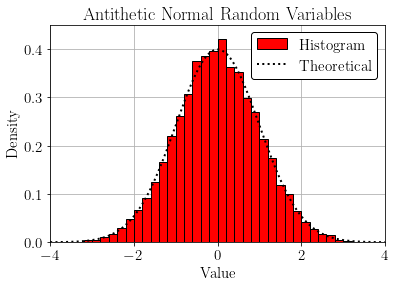

In [7]:
xx = np.linspace(-4.0, 4.0, 401)

fig02 = plt.figure(figsize = (6, 4))
ax = fig02.add_subplot(111)
ax.hist(
    sequence,
    bins = np.linspace(-4.0, 4.0, 41),
    color = "red",
    density = True,
    edgecolor = "black",
    label = "Histogram"
)
ax.plot(
    xx,
    stats.norm.pdf(xx),
    "k:",
    label = "Theoretical",
    linewidth = 2
)
ax.set_xlim((-4.0, 4.0))
ax.set_ylim((0.0, 0.45))
ax.set_xlabel("Value")
ax.set_ylabel("Density")
ax.set_title("Antithetic Normal Random Variables")
ax.legend(edgecolor = "black", framealpha = 1.0)
ax.grid(True)

## Uniform Distribution
#### Compare Within-Pair Observations to Across-Pair Observations

In [8]:
uniform = antithetic.scalars.Uniform(correlation = base_rho, seed = seed_value)

sequence = uniform.get_sequence(2*num_pairs)
evens = sequence[::2]
odds = sequence[1::2]

r_within = antithetic.correlation(odds, evens)
r_across = antithetic.correlation(odds[:-1], evens[1:])

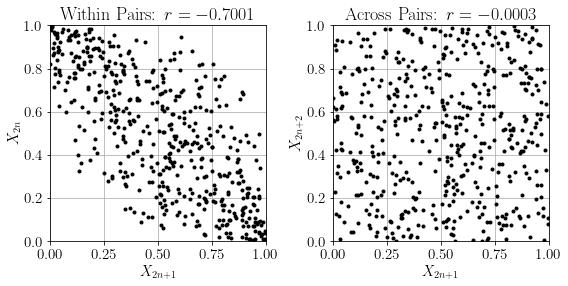

In [9]:
fig03 = plt.figure(figsize = (8, 4))
ax = fig03.add_subplot(121, aspect = "equal")
ax.plot(odds[::step], evens[::step], "k.")
ax.set_xlim((0.0, 1.0))
ax.set_ylim((0.0, 1.0))
ax.set_xlabel(r"$X_{2n+1}$")
ax.set_ylabel(r"$X_{2n}$")
ax.set_title(r"Within Pairs: $r=%.4f$" % (r_within,))
ax.grid(True)

ax = fig03.add_subplot(122, aspect = "equal")
ax.plot(odds[:-1:step], evens[1::step], "k.")
ax.set_xlim((0.0, 1.0))
ax.set_ylim((0.0, 1.0))
ax.set_xlabel(r"$X_{2n+1}$")
ax.set_ylabel(r"$X_{2n+2}$")
ax.set_title(r"Across Pairs: $r=%.4f$" % (r_across,))
ax.grid(True)
plt.tight_layout()

#### Check Marginal Distribution

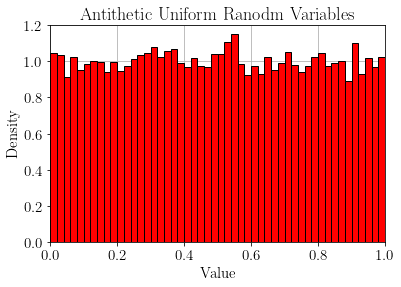

In [10]:
fig04 = plt.figure(figsize = (6, 4))
ax = fig04.add_subplot(111)
ax.hist(
    sequence,
    bins = np.linspace(0.0, 1.0, 51),
    color = "red",
    density = True,
    edgecolor = "black"
)
ax.set_xlim((0.0, 1.0))
ax.set_ylim((0.0, 1.2))
ax.set_xlabel("Value")
ax.set_ylabel("Density")
ax.set_title("Antithetic Uniform Ranodm Variables")
ax.grid(True)

#### Two-Dimensional Histogram: Empirical Joint Density

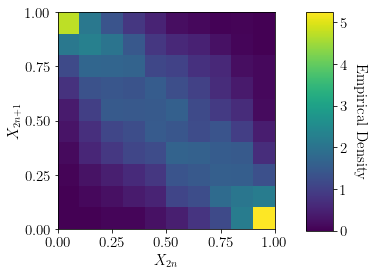

In [11]:
fig05 = plt.figure(figsize = (5, 4))
fig05.subplots_adjust(right = 0.8)
ax = fig05.add_subplot(111, aspect = "equal")
cs = ax.hist2d(
    evens, odds,
    bins = np.linspace(0.0, 1.0, 11),
    density = True
)[-1]
cax = plt.axes([0.85, 0.12, 0.075, 0.76])
cbar = plt.colorbar(cs, cax = cax)
ax.set_xlim((0.0, 1.0))
ax.set_ylim((0.0, 1.0))
ax.set_xlabel(r"$X_{2n}$")
ax.set_ylabel(r"$X_{2n+1}$")
ax.set_yticks(np.linspace(0.0, 1.0, 5))
cbar.ax.set_ylabel(
    "Empirical Density",
    labelpad = 20,
    rotation = 270
)
ax.grid(False)

#### Plot Within-Pair Observations at Different Correlations

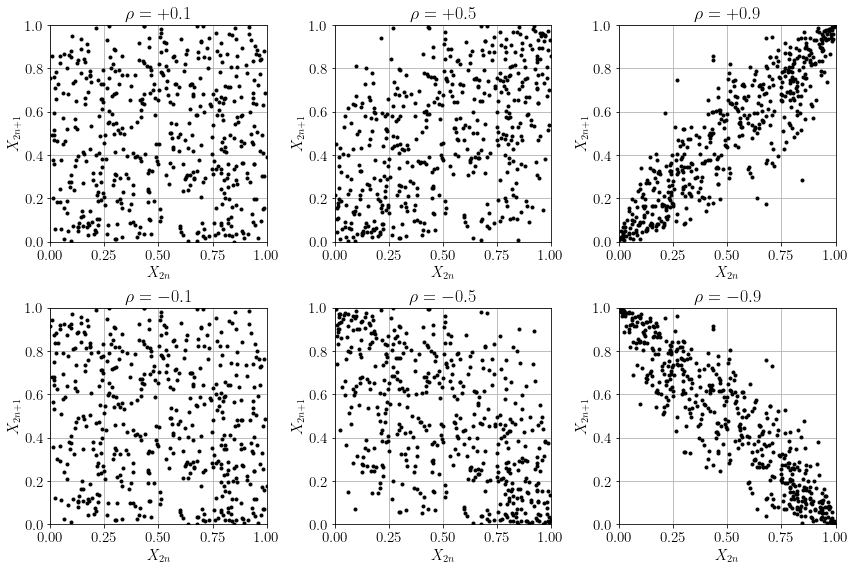

In [12]:
fig06 = plt.figure(figsize = (12, 8))
for (k, rho) in enumerate([0.1, 0.5, 0.9, -0.1, -0.5, -0.9]):
    sequence = antithetic.scalars.Uniform(
        correlation = rho,
        seed = 22475
    ).get_sequence(1000)
    
    ax = fig06.add_subplot(231 + k, aspect = "equal")
    ax.plot(*sequence.reshape((-1, 2)).T, "k.")
    ax.set_xlim((0.0, 1.0))
    ax.set_ylim((0.0, 1.0))
    ax.set_xlabel(r"$X_{2n}$")
    ax.set_ylabel(r"$X_{2n+1}$")
    ax.set_title(r"$\rho=%+.1f$" % (rho,))
    ax.grid(True)
plt.tight_layout()